<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/sem06_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAP: class 6_oop

______

# План на сегодня:

* классы...
* классы...
* и классы.

______

# Введение

Класс является фундаментальным строительным блоком в Python. Это основа не только многих популярных программ и библиотек, но и стандартной библиотеки Python. Понимание того, что такое классы, когда их использовать и как они могут быть полезны, является существенным. В процессе мы рассмотрим, что означает термин объектно-ориентированное программирование и как он связан с классами Python.

## Все в Python является объектом
Как мы уже обсуждали на предыдущих занятиях все в Python является объектом. Рассмотрим к примеру объект `[1, 2, 3]`, что мы уже знаем про этот объект? Он имеет тип `list`, имеет различные методы: `.append(4)` - добавит элемент 4 в наш список, `.pop()` - удалит последний элемент из списка, и т.д. Самое важное, все описанное выше относится не к конкретному списку `[1, 2, 3]`, а вообще ко всем объектам типа `list`. Мы видели множество различных типов в Python: `int, list, string, ...`, но очевидно, что для некоторых наших задач нам бы хотелось создать свой тип. Именно для таких целей и существуют классы в Python.

Давайте посмотрим на пример простого класса:
- Определяем класс с помощью ключевого слова `class`
- Название класса обычно пишут с большой буквы, если название состоит из нескольких слов, то каждое слово выделяют заглавной буквой, например, `MyCoolClass`
- Далее можно определить некоторые переменные класса, которые называют аттрибутами или полями
- Для создания метода (функции, которая специфичная для конкретного класса) используем ключевое слово `def`. Тут все как с обычными функциями, единственное отличие состоит в том, что если мы хотим вызывать наш метод от объекта (`cat.meow()`), то первым аргументом должен быть `self`. Подробнее про `self` написано ниже
- `cat = Cat()` - создание конкретного объекта (инстанса, экземпляра) класса

In [ ]:
class Cat:
    name = 'Мурка'
    def meow(self):
        print('MeowMeowMeow')

print('Аттрибут name:', Cat.name)
cat = Cat()
print('Тип объекта cat:', type(cat))
print('Аттрибут name у объекта cat:', cat.name)
cat.meow()

Рассмотрим следующий пример:  
Как можно заметить, если мы поменяем аттрибут `name` класса `Cat`, то этот аттрибут изменится и у объектов класса. Так происходит потому, что переменные, определенные в классе без ключевого слова `self`, относятся к самому классу и являются общими для всех инстансов класса.

In [ ]:
cat_1 = Cat()
cat_2 = Cat()
print('cat_1 name:', cat_1.name)
print('cat_2 name:', cat_2.name)
Cat.name = 'OMG'
print('cat_1 name:', cat_1.name)
print('cat_2 name:', cat_2.name)

Но что если мы хотим, чтобы у каждого отдельного инстанса класса `Cat` было свое имя?
Для этого используется специальный метод `__init__(self, ...)`, который вызывается при создании класса:

In [ ]:
class Cat:
    def __init__(self, name):
        self.name = name
    
    def meow(self):
        print(f'MeowMeowMeow {self.name}')

cat_lizka = Cat('Lizka')
cat_gav = Cat('Gav')
cat_lizka.meow()
cat_gav.meow()

Зачем выше используется ключевое слово `self`? Ключевое слово `self` используется для разделения переменных и функций, которые относятся ко всем объектам типа в целом и к конкретному объекту.


In [ ]:
class Cat:
    class_name = 'Cat'  # данная переменная является общей для всех объктов класса
    def __init__(self, name):
        # эта переменная привязана уже к конкретному инстансу данного класса
        # если ее поменять у одного объекта, то у других не поменяется ничего
        self.name = name  
    
    # функция, которая относится к классу
    def class_meow():
        print('Class Meow')

    # функция, которая относится к конкретному объекту
    # печатается name конкретного объекта
    def meow(self):
        print(f'MeowMeowMeow {self.name}')

print(Cat.class_name)
Cat.class_meow()
# print(Cat.meow()) - выдаст ошибку, так как функция meow применяется к конкретному инстансу
# print(Cat.name) - такого аттрибута у класса нет, так как он создается у конкретного инстанса при создании класса

cat = Cat('Lizka')
print(cat.name)
cat.meow()

Почему мы не можем позвать функцию класса от инстанса?
Когда мы выполняем `cat.function(x, y)`, то Python неявно делает примерно следующее: `cat.function(x, y) = Cat.function(cat, x, y)`. То есть, когда мы вызываем `cat.class_meow()` Python делает `Cat.class_meow(cat)`, но функция `class_meow` не принимает никаких аргументов, что и написано в трэйсбэке ошибки. Ровно по той же причине для функций, которые относятся к объектам нам требуется всегда передавать `self` первым аргументом: `cat.meow(self) = Cat.meow(cat)`.

То есть, `self` это по сути обозначение для инстанса, чтобы было удобнее описывать необходимую логику при создании класса.

In [ ]:
cat.meow()

In [ ]:
# На всякий случай можно убедиться, что написанное выше правда:
Cat.meow(cat)

Рассмотрим менее примитивный пример:

In [ ]:
class Customer:
    """
    Клиент ABC Bank. Имеет следующие аттрибуты:
    Attributes:
        name: строка, представляющая имя пользователя.
        balance: вещественное число, являющееся балансом клиента.
    """

    def __init__(self, name):
        """Вернет объект с именем *name*.""" 
        self.name = name

    def set_balance(self, balance=0.0):
        """Создаст счет для клиента."""
        self.balance = balance

    def withdraw(self, amount):
        """Вернет сумму на балансе, которая останется после снятия *amount*."""
        if amount > self.balance:
            raise RuntimeError('Amount greater than available balance.')
        self.balance -= amount
        return self.balance

    def deposit(self, amount):
        """Вернет сумму на балансе, которая останется после внесения *amount* на счет."""
        self.balance += amount
        return self.balance
    
    def info(self):
        """Печатает информацию о клиенте"""
        print(f'Имя клиента: {self.name}')
        print(f'Остаток на счете: {self.balance}')

john = Customer('John')
petr = Customer('Petr')

# клиенты у нас есть, но счет у них еще не создан, давайте создадим его
# если его не создать, то при вызове методов withdraw и deposit у нас возникнет
# ошибка, ведь аттрибута balance у наших клиентов еще нет
john.set_balance(1000)
petr.set_balance(1500)

print('Баланс клиента Petr после снятия 100$:', petr.withdraw(100))
print('Баланс клиента John после пополнения счета на 50$:', john.deposit(50), end='\n\n')
john.info()

# Очевидно, что все переменные и функции выше должны относиться к объектам, а не 
# к классу в целом, поэтому везде мы использовали ключевое слово self
# Следующая функция является аналогом метода info
def print_customer_info(customer):
    print(f'Имя клиента: {customer.name}')
    print(f'Остаток на счете: {customer.balance}')

print_customer_info(petr)

# Магические методы

Мы научились уже создавать свои типы с аттрибутами и методами, но пока мы умеем делать еще не все, что умеют стандартные типы Python. К примеру, у списка есть операция сложения `[1, 2] + [3] -> [1, 2, 3]`, а также другие операции.
Чтобы мы могли проводить подобные операции с нашим классом необходимо использовать магичесие методы. 

Рассмотрим операцию сложения на примере класса комплексных чисел:
- Магический метод для такой операции имеет имя `__add__`, он принимает два аргумента - первый, как обычно `self`, а второй обозначает объект, с которым будет производиться сложение. В нашем случае, это другой объект класса Complex или объект типа int или float. Стоит отметить, что обычно подразумевается, что при сложении возвращается новый объект, именно поэтому мы возвращаем инстанс нашего класса.
- На самом деле, никакой магии нет, просто Python делает все за нас, а именно `a + b = a.__add__(b) = Complex.__add__(a, b)`.
- Метод `__add__` умеет только складывать наш объект с другим объектом только  случае, когда мы прибавляем другой объект справа, если же мы попробуем выполнить `1 + a = 1.__add__(a)`, то будет ошибка. Чтобы такой ошибки не было, необходимо написать еще метод `__radd__` (right add, то есть наш объект прибавляется справа), он нужен как раз для таких случаев. Сначала питон попробует `1.__add__(a)`, после чего из-за ошибки попробует `a.__radd__(1)`. Так как у нас уже реализован метод `__add__`, то можно написать `__radd__`, через `__add__`

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        # если other является объектом типа Complex
        if isinstance(other, Complex):
            return Complex(self.real + other.real,
                        self.imag + other.imag)
        # если other целое или вещественное число
        elif isinstance(other, (float, int)):
            return Complex(self.real + other, self.imag)
    
    def __radd__(self, other):
        return self + other

In [ ]:
a = Complex(1, 1)
b = Complex(2, 2)

c = a + b
print(f'c = {c.real} + {c.imag}i')

d = a + 3
print(f'd = {d.real} + {d.imag}i')

e = 3 + a
print(f'e = {e.real} + {e.imag}i')

### `__repr__` и `__str__`
Как вы уже могли заметить, что для печати комплексных чисел нам пришлось отдельно обращаться к `.real` и `.imag`. Посмотрим, что будет, если мы попробуем напечатать объект класса:

Такой результат нас явно не устраивает, ведь от `print(a)` мы бы хотели получить `1 + i`. Вспомним для начала, как работает функция `print`. `print` сначала переводит аргументы в тип `str` после чего уже выводит строки в стандартный поток. По дефолту, объект класса переводится в строку как `<__main__.ClassName object at ...>`, но с помощью метода `__str__` мы можем изменить такое поведение.

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    # <определенные выше методы опущены, чтобы не загромождать пространство ненужным в данном примере кодом>

    # метод str должен возвращать строку, которая репрезентует наш объект
    def __str__(self):
        # второе слагаемое это просто плюс, если мнимая часть неотрицательная и минус иначе
        return str(self.real) + (' + ' if self.imag >= 0 else ' - ') + str(abs(self.imag)) + 'i'

a = Complex(1, 2)
b = Complex(3, -2)
print(a)
print(b)
a

Все хорошо, мы научились переводить наш объект в строчку, но когда мы не используем функцию `print`, все равно получаем не то, что хотим. В примере выше, в последней строке написана переменная `a`, так как мы работаем в jupyter notebook (colab это по сути гугловый jupter notebook), то должно было еще напечататься значение переменной `a`. Проблема заключается в том, что в данном случае объект не переводится в строку, а вызывается магический метод `.__repr__()`. Разница между `__repr__` и `__str__` заключается в следующем:  
- `__repr__` должен в виде строки однозначно выдавать информацию об объекте
- `__str__` должен переводить в удобную для воспроятия строку
Понимаю, что написанное выше скорее всего не звучит убедительно. Подробнее можно почитать тут: [Difference between __str__ and __repr__?
](https://stackoverflow.com/questions/1436703/difference-between-str-and-repr). Для наших же целей можно предполагать что эти методы примерно одинаковые, только `__repr__` сильнее, так как при переводе объекта в строку сначала позовется метод `__str__`, но если он отсутствует, позовется `__repr__`. То есть, можно определить только `__repr__` и все будет работать как мы хотим.

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    # <определенные выше методы опущены, чтобы не загромождать пространство ненужным в данном примере кодом>

    # определим только метод __repr__
    def __repr__(self):
        # второе слагаемое это просто плюс, если мнимая часть неотрицательная и минус иначе
        return str(self.real) + (' + ' if self.imag >= 0 else ' - ') + str(abs(self.imag)) + 'i'

a = Complex(1, 2)
b = Complex(3, -2)
print(a)
print(str(b))
a

Пример, в котором `__repr__` не совпадает с `__str__`

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    # <определенные выше методы опущены, чтобы не загромождать пространство ненужным в данном примере кодом>

    def __str__(self):
        # второе слагаемое это просто плюс, если мнимая часть неотрицательная и минус иначе
        return str(self.real) + (' + ' if self.imag >= 0 else ' - ') + str(abs(self.imag)) + 'i'

    def __repr__(self):
        return f'Real: {self.real}, Imaginary: {self.imag}'

a = Complex(1, 2)
b = Complex(3, -2)
print(a)
print(str(b))
a

- Другие магические методы: str, repr, mul, sub, iadd
- Наследование
- Класс Fraction

### Магические методы для арифметических операций

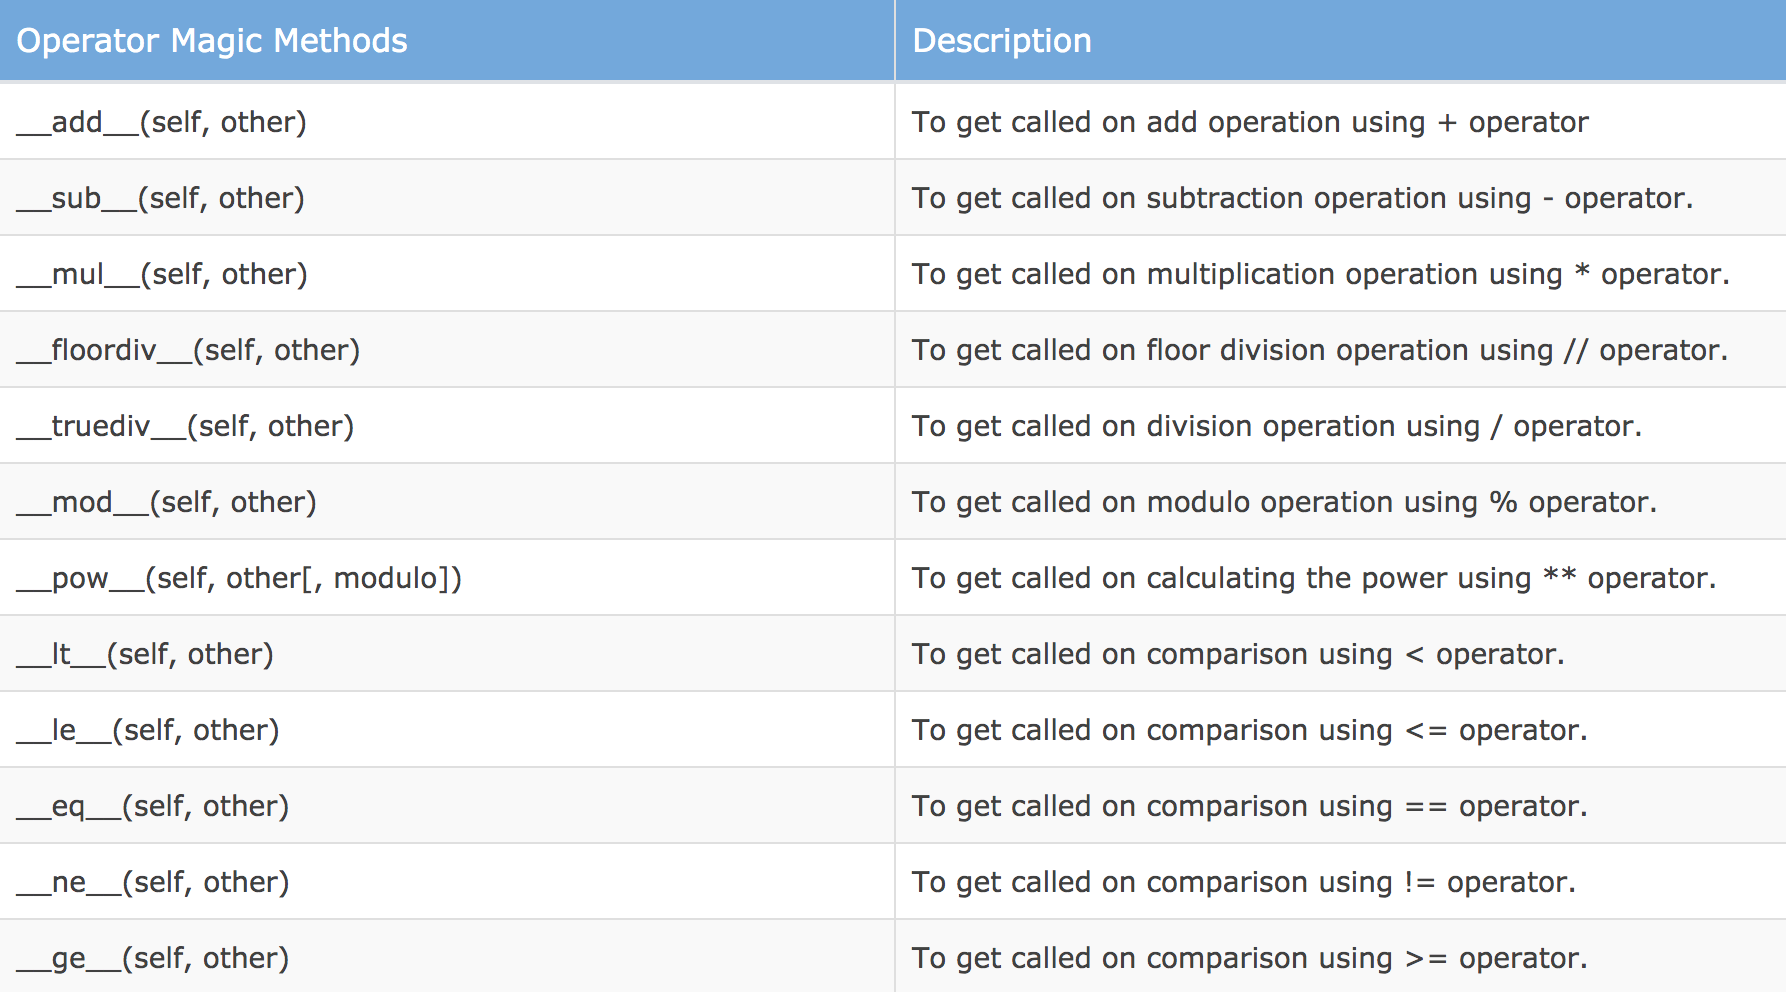

Аналогично сложению для умножения, вычитания и прочих арифметических операций существуют свои магические методы представленные выше.

Посмотрим на некоторые из них в следующем примере:
- Заметьте, что нам не обязательно реализовывать вычитание, если у нас уже реализовано сложение и унарный минус. Действительно, `a - b = a + (-b)`. То есть, в случае с `__sub__`, нам не пришлось даже реализовывать `__rsub__`.

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real + other.real,
                        self.imag + other.imag)
        elif isinstance(other, (float, int)):
            return Complex(self.real + other, self.imag)

    def __radd__(self, other):
        return self + other
    
    # определяет унарный минус -a (a является объектом типа Complex)
    def __neg__(self):
        return Complext(-self.real, -self.imag)

    def __sub__(self, other):
        return self + (-other)

    def __mul__(self, other):
        return Complex(self.real*other.real - self.imag*other.imag,
                       self.imag*other.real + self.real*other.imag)

    # метод для корректной работы функции abs от инстансов Complex
    def __abs__(self):
        return sqrt(self.real**2 + self.imag**2)

    # оператор сравнения
    def __eq__(self, other):
        return self.real == other.real and self.imag == other.imag
    
    def __str__(self):
        return str(self.real) + (' + ' if self.imag >= 0 else ' - ') + str(abs(self.imag)) + 'i'

    def __repr__(self):
        return f'Real: {self.real}, Imaginary: {self.imag}'

In [ ]:
a = Complex(3, 1)
b = Complex(1, 2)
print(f'Sum of a and b: {a + b}')
print(f'Unary negation of a: {-a}')
print(f'Substract b from a: {a - b}')
print(f'Product of a and b: {a * b}')
print(f'Is a and b equal? A: {a == b}')

В результате большинства арифметических операций у нас создавались новые объекты. Но также существуют так называемые `inplace` версии этих операций, которые не возвращают новый объект, а меняют старый. Вы уже знакомы с такими операциями: `+=, -=, *=, /=, ...`. Соответствующие магические методы для таких операций начинаются с `i`, то есть, `__iadd__, __isub__, __imul__, __idiv__`. Python обрабатывает эти операции по такой логике, если метод `__iadd__` определен, то при `a += b` будет вызван именно он, если же его нет, но определен `__add__`, то `a += b <=> a = a + b`. То есть, inplace методы имеет смысл реализовывать, если вам важно, что при таких операциях будет меняться сам объект, а не перезапишется новым.  
Посмотрим на примере сложения:

Чтобы проследить за тем, что происходит с объектом добавим аттрибут `special_id`. Как мы видим, в случае реализованного `__iadd__` этот аттрибут не изменился, но поменялся при `a = a + b`. 

In [ ]:
class Complex:
    def __init__(self, real, imag=0.0):
        self.real = real
        self.imag = imag
        self.special_id = 0

    def __add__(self, other):
        # если other является объектом типа Complex
        if isinstance(other, Complex):
            return Complex(self.real + other.real,
                        self.imag + other.imag)
        # если other целое или вещественное число
        elif isinstance(other, (float, int)):
            return Complex(self.real + other, self.imag)
    
    def __radd__(self, other):
        return self + other
    
    def __iadd__(self, other):
        self.real += other.real
        self.imag += other.imag
        return self
    
    def __repr__(self):
        return str(self.real) + (' + ' if self.imag >= 0 else ' - ') + str(abs(self.imag)) + 'i'

a = Complex(3, 1)
b = Complex(1, 2)

a.special_id = 27

a += b
print(f'a after a += b: {a}')
print(f'a special id: {a.special_id}')
a = a + b
print(f'a after a = a + b: {a}')
print(f'a special id: {a.special_id}')


### `__call__`
Последний магический метод, который мы рассмотрим и который пригодится вам в домашнем задании называется `__call__`. Данный метод используется когда мы хотим, чтобы наш объект вел себя как функция. Рассмотрим пример, в котором реализован примитивный класс для многочлена степени 2: $a + bx + cx^2$. 

`__call__(self, x)` будет реализовывать подсчет значения функции при заданном $x$.

In [ ]:
class QuadraticPoly:
    def __init__(self, a, b, c):
        self.coeffs = [a, b, c]
    
    def __call__(self, x):
        result = 0
        for i in range(3):
            result += self.coeffs[i] * (x ** i)
        return result

quad_poly = QuadraticPoly(1, 2, 3)
print(f'Value of 1 + 2x + 3x^2 at 0: {quad_poly(0)}')
print(f'Value of 1 + 2x + 3x^2 at 1: {quad_poly(1)}')

## Дополнительные материалы для лучшего погружения в классы:
- [Object-Oriented Programming (OOP) in Python 3](https://realpython.com/python3-object-oriented-programming/)
- [Python Classes and Inheritance MIT lecture](https://youtu.be/FlGjISF3l78)

# Наследование

Мы уже научились создавать классы и узнали о магических методах, осталось узнать про наследование. 

Все классы, которые мы рассматривали до этого, создавались "с нуля". И до тех пор, пока описываемые классами сущности мало похожи друг на друга, создание абсолютно новых классов работает отлично. Но что, если мы хотели бы создать похожий класс, который немного меняет логику лишь пары методов? Для таких ситуаций и используется наследование. Формально говоря, наследование - это получение нового типа объектов на основе уже существующего с частично или полностью заимствованный у родительского типа функциональностью. 

**Рассмотрим следующий пример:**  
Операции сложения и умножения на вещественное или целое число для комплексных чисел очень похожи на поведение свободных векторов на плоскости. Они соответствуют сложению векторов или умножение вектора на число, где действительная часть комплексного числа является x-координатой вектора, а мнимая - y-координатой. 

Кроме того, свободный вектор обладает некоторыми операциями, которые характерны только для него, но не для вещественного числа. Например, это может быть метод length, вычисляющий длину вектора. Нам не хотелось бы засорять код для описания комплексного числа методами для работы со свободным вектором, но с другой стороны не хотелось бы заново переписывать методы сложения и умножения для свободных векторов.

В такой ситуации разумно создать новый класс для описания свободного вектора (или точки на плоскости, что то же самое), который унаследовал бы все методы комплексных чисел и добавил бы новый метод length.

Синтаксис наследования достаточно прост, нужно при создании класса указать в круглых скобках класс, от которого мы хотим отнаследоваться.

In [ ]:
class Point(Complex):
    def length(self):
        return (self.real ** 2 + self.imag ** 2) ** (1 / 2)

    def __str__(self):
        return f'[{self.real}, {self.imag}]'
    
    def __repr__(self):
        return f'x: {self.real}, y: {self.imag}'


point_a = Point(5, 6)
point_b = Point(1, -1)
print(f'Point a: {point_a}')
print(f'Sum of points: {point_a + point_b}')
point_b

В примере выше, мы всего лишь переопределили методы `__str__` и `__repr__`, так как мы явно хотим приводить двумерные векторы к строке иначе, чем комплексные числа, а также добавили новый метод вычисляющий норму вектора. Объект класса `Point` имеет доступ ко всем методам родителя `Complex`. То есть, мы к примеру можем складывать точки без определения `__add__`, вот только при сложении двух точек мы получаем объект типа Complex. Действительно, так как этот метод не был переопределен, то его логика осталась такой же как и у метода определенного внутри `Complex`, а он возвращает объект типа `Complex`. Чтобы это поправить давайте еще переопределим `__init__` таким образом, чтобы мы могли создавать `Point` не только от двух точек, а еще и от объекта типа `Complex`. 

Также, для примера, создадим свою особую ошибку, которая будет указывать на то, что у нас некорректно переданы параметры в `__init__`. Чтобы это сделать, надо создать ошибку и отнаследовать от базового класса ошибок - `BaseException`.

- `super()` означает просто обращение к родителю. Также мы могли бы использовать `Complex`, вместо `super()`.

In [ ]:
class IncorrectPointInitException(BaseException):
    pass

class Point(Complex):
    def __init__(self, *args):  # *args означает неопределенное число элементов, которые положатся в список под названием args
        # Если нам передали один аргумент, то мы предполагаем, что это объект типа Complex
        if len(args) == 1 and isinstance(args[0], Complex):
            x, y = args[0].real, args[0].imag
        # Если нам передали два аргумента, то мы предполагаем, что нам передали два числа
        elif len(args) == 2:
            x, y = args
        # Если пришло что-то иное, кинем созданную ошибку
        else:
            raise IncorrectPointInitException()
        # проинициализируем класс родитель
        super().__init__(x, y)  # = Complex.__init__(x, y)

    def length(self):
        return (self.real ** 2 + self.imag ** 2) ** (1 / 2)

    def __str__(self):
        return f'[{self.real}, {self.imag}]'
    
    def __repr__(self):
        return f'x: {self.real}, y: {self.imag}'
    
    def __add__(self, other):
        # вызываем метод __add__ в том виде, в котором он реализован у Complex
        # в переменной complex_sum_result у нас лежит объект типа Complex
        complex_sum_result = super().__add__(other)

        # вернем Point, который создается от объекта типа Complex
        # такой вариант инициализации мы уже реализовали в __init__
        return Point(complex_sum_result)
    
point_a = Point(5, 6)
point_b = Point(1, -1)
print(f'Point a: {point_a}')
print(f'Sum of points: {point_a + point_b}')
point_b

Пример выше избыточен и многое было сделано в учебных целях, чтобы показать, что можно переопределить `__init__` и при этом корректно проинициализировать класс родитель, а также как переопределить метод, но использовать в нем результат аналогичного метода в классе родителя.

Если делать просто, то можно сделать так:

In [ ]:
class Point(Complex):
    def length(self):
        return (self.real ** 2 + self.imag ** 2) ** (1 / 2)

    def __str__(self):
        return f'[{self.real}, {self.imag}]'
    
    def __repr__(self):
        return f'x: {self.real}, y: {self.imag}'
    
    def __add__(self, other):
        # вызываем метод __add__ в том виде, в котором он реализован у Complex
        # в переменной complex_sum_result у нас лежит объект типа Complex
        complex_sum_result = super().__add__(other)

        # вернем Point, который создается от объекта типа Complex
        # такой вариант инициализации мы уже реализовали в __init__
        return Point(complex_sum_result.real, complex_sum_result.imag)
    
point_a = Point(5, 6)
point_b = Point(1, -1)
print(f'Point a: {point_a}')
print(f'Sum of points: {point_a + point_b}')
point_b

Последнее о чем стоит упомянуть - инстанс класса ребенка также является инстансом класса родителя:



In [ ]:
print('point_a type:', type(point_a))
print('point_a is istance of Point:', isinstance(point_a, Point))
print('point_a is istance of Complex:', isinstance(point_a, Complex))

# Исключения

Вы уже наверняка сотню раз встретились с тем, что на вас Питон ругается красным текстом и ваша программа из-за этого не работает. Вот именно эти ругательства называются исключениями (exceptions) в Питоне (то же самое что "ошибка"). 

Есть много типов ошибок: KeyError, ValueError, ArgumentError, OSError, RuntimeError... Это не просто так - название ошибки (её тип) и дополнительное описание позволяют правильно написать программу и исправить её. 



### Вызов исключений

Кроме встроенных в built-in ошибок, которые вы встречали раньше (хоть и не хотели), можно самому эти исключения вызывать.

In [ ]:
a = input()
if ' ' in a:
    raise ValueError('Вы ввели не одно слово')

Обычно это нужно, чтобы при использовании вашей программы кем-то еще (пользователь, вы сами), можно было показать, что происходит что-то не так при исполнении программы или при вводе изначальных данных. Особенно при создании своих классов.

По [[ссылке]](https://docs.python.org/3.7/library/exceptions.html) можно посмотреть какие бывают исключения в Питоне. Кроме того, можно создавать собственные классы ошибок

In [ ]:
class MyCustomError(Exception):
    ''' Вызываете и ловите её как вам нужно'''
    pass

def foo():
    raise MyCustomError('что-то произошло')

try:
    foo()
except MyCustomError as e:
    print('Ошибка возникла, вот сообщение:', e)
    
    

In [ ]:
class NumberNotInRangeError(Exception):
    '''Исключение возникает, когда число не в указанном диапазоне 

    Аттрибуты:
        number -- входное число, которые вызвало ошибку
        message -- объяснение ошибкиОшибка возникла, вот сообщение: что-то произошло

    '''

    def __init__(self, number, message="Number is not in (0, +\infty) range"):
        self.number = number
        self.message = message
        super().__init__(self.message)

    def __str__(self):
        return f'Your numbrt: {self.number} -> {self.message}'
    
number = int(input("Enter number: "))
if not 0 < number:
    raise NumberNotInRangeError(number)

### Ловля ошибок

Кроме вызова исключений, их еще можно ловить. Это делается с помощью конструкции `try-except`.

In [ ]:
a = 100
try:
    a /= float(input('Введите число: '))
except ZeroDivisionError:
    print('Вы поделили на ноль, не надо так')
    a /= 1e-16
except ValueError as e:
    print(f'Вы ввели не число, не надо так, вот ошибка: {e}')
print(f'a = {a}')

Если необходимо поймать не конкретный класс ошибки, а в принципе любую ошибку, то стоит использовать в качестве класса ошибки самый большой из них - `Exception` или `BaseException`. Однако второй класс включает вообще все возможные ошибки, в том числе `KeyboarInterrupt`, которая появляется, когда вы хотите остановить программу и нажимаете Crtl-D/C/F. Вообще любой тип ошибки принадлежит ему, а первому только "питоновские". Можно написать конструкцию `try-except` и вовсе без указания типа ошибки, но так мы в своем коде явно показываем, что нам все равно на класс ошибки, или наоборот, что нам важен какой-то конкретный.

In [ ]:
a = 100
try:
    a /= float(input('Введите число: '))
except:
    print('Что-то пошло не так')

print(f'a = {a}')

# Важное (не совсем резюме) за сегодня:



* Классы в питоне - это способ работать с объектом у которого необходимо иметь состояние. Как правило, вам необходимо с этим состоянием как-то работать: модифицировать или узнавать что-то. Для этого в классах используются методы: особые функции, которые имеют доступ к содержимому вашего объекта.



Рассмотрим пример. Предположим у вас есть сеть отелей. И вам было бы очень удобно работать с отелем, кок отдельным объектом. Что является состоянием отеля? Для простоты предположим, что только информация о заполненных/свободных номерах. Тогда мы можем описать отель следующим образом:

```python
class Hotel:
    def __init__(self, num_of_rooms):
        self.rooms = [0 for _ in range(num_of_rooms)]
```

При создании объекта `Hotel` ему нужно будет передать количество комнат в этом отеле. Информацию о свободных и занятых комнатах мы будем хранить в массиве длины `num_of_rooms`, где 0 - комната свободна, 1 - комната занята.

Какие функции помощники нам нужны? Мы бы наверное хотели уметь занимать комнаты (когда кто-то въезжает) и освобждать. Для этого напишем два метода `occupy` и `realize`.

```python
class Hotel:
    def __init__(self, num_of_rooms):
        self.rooms = [0 for _ in range(num_of_rooms)]
        
    def occupy(self, room_id):
        self.rooms[room_id] = 1
        
    def free(self, room_id):
        self.rooms[room_id] = 0
```

Отлично, теперь мы можем выполнять элементарные действия с нашим классом. Попробуйте создать класс и занять несколько комнат.

In [ ]:
class Hotel:
    def __init__(self, num_of_rooms):
        self.rooms = [0 for _ in range(num_of_rooms)]
        
    def occupy(self, room_id):
        self.rooms[room_id] = 1
        
    def free(self, room_id):
        self.rooms[room_id] = 0

In [ ]:
# создадим переменную, в которой будем хранить записи для отеля с 10 комнатами
hotel = Hotel(num_of_rooms=10)

In [ ]:
hotel

In [ ]:
# к нам приехали гости в комнаты 3 и 6
hotel.occupy(3) # заселим гостей в номер 3

In [ ]:
hotel.rooms

In [ ]:
hotel.occupy(6) # заселили гостей в номер 6

In [ ]:
hotel.rooms

In [ ]:
# гости из комнаты 3 уехали
hotel.free(3)

In [ ]:
hotel.rooms

Зачем нам нужны классы? Ведь можно было написать функцию
```python
def occupy(rooms, room_id):
    rooms[room_id] = 1
    return rooms
```

Плюс работы с объектами в том, что тем, кто пользуются нашим классом (включая нас самих) не нужно думать о том, как мы реализовали хранение комнат. Если в какой-то момент мы захотим изменить `list` на `dict` (например мы заметили, что так быстрее), никто ничего не заметит. Код пользователей не изменится. Тоже самое касается функциональности - если мы вдруг решили, что нам нужно добавить бронирование на дату, мы можем это сделать и те кто уже пользуются нашим классом - ничего не заметят. У них ничего не сломается. А это очень важно.

# Время приключений! (заданий)

![](https://media.giphy.com/media/fm4WhPMzu9hRK/giphy.gif)

## Задача про классы 1.1

Допишите несколько методов в класс `Hotel`.

Напишите метод `occupancy_rate`. Метод должен возвращать долю комнат, которые заняты.

Напишите метод `close`. Метод должен освобождать все комнаты. Если `occupancy_rate` написан корректно, то после `close` `occupancy_rate` должен возвращать 0.

In [ ]:
# ваш код

## Задача про классы 1.2
Мы хотим, чтобы пользователь нашего класса не натворил глупостей. Например, не пытался занять уже занятую комнату. Допишите методы `occupy` и `free`. Проверьте внутри них, что состояние комнаты действительно меняется. Иначе вы должны бросить исключение с понятным текстом.

Напоминаю, что исключение - это такая конструкция, когда программа завершает работу из некоторой точки. Как правило в случае появления ошибки.
Синтаксис
```python
raise RuntimeError("Bad news")
```

In [ ]:
# ваш код

## Задача про классы 1.3
Добавьте возможность бронировать номера. Метод назовем `book(self, date, room_id)`. На вход приходит дата и номер комнаты и она становится занята. Если бронь не удалась, бросьте исключение. Перед бронью убедитесь, что комната свободна. Для этого напишите метод `is_booked(self, date, room_id)`. 

In [ ]:
# ваш код

## Задача про классы 1.4
Мы, как отель, хотим знать свою выручку на какой-то день. Напишите метод `income(self, date)`. Он должен возвращать количество денег, которое заработает отель в этот день. Представим, что стоймость всех комнат одинакова и равна 200$.

In [ ]:
# ваш код